In [1]:
import uproot
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.graph_utils import create_graph

In [3]:
def network_plot_3D(G, color):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111, projection='3d')
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        xi = []
        yi = []
        zi = []
        for value in pos.values():
            xi.append(value[0])
            yi.append(value[1])
            zi.append(value[2])
            
        ax.scatter(xi, yi, zi, s=30, c=color)#, cmap='rainbow', s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for j in G.edges():
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
            # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)

In [4]:
def get_array(tree):
    vx     = tree['vertices_x'].array()
    vy     = tree['vertices_y'].array()
    vz     = tree['vertices_z'].array()
    energy = tree['vertices_energy'].array()
    tl     = tree['trackster_label'].array()
    return vx, vy, vz, energy, tl

In [5]:
file_name = "tracksters_ds_pion.root"
file = uproot.open(file_name)
file.classnames()

{'tracksters;1': 'TTree'}

In [6]:
tracksters = uproot.open({file_name: 'tracksters'})
tracksters.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nvertices_x          | int32_t                  | AsDtype('>i4')
vertices_x           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_y          | int32_t                  | AsDtype('>i4')
vertices_y           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_z          | int32_t                  | AsDtype('>i4')
vertices_z           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_energy     | int32_t                  | AsDtype('>i4')
vertices_energy      | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_indexes    | int32_t                  | AsDtype('>i4')
vertices_indexes     | int64_t[]                | AsJagged(AsDtype('>i8'))
trackster_label      | int64_t                  | AsDtype('>i8')
trackster_event      | int64_t                  | AsDtype('>i8')


In [7]:
vx, vy, vz, energy, tl = get_array(tracksters)
from itertools import islice

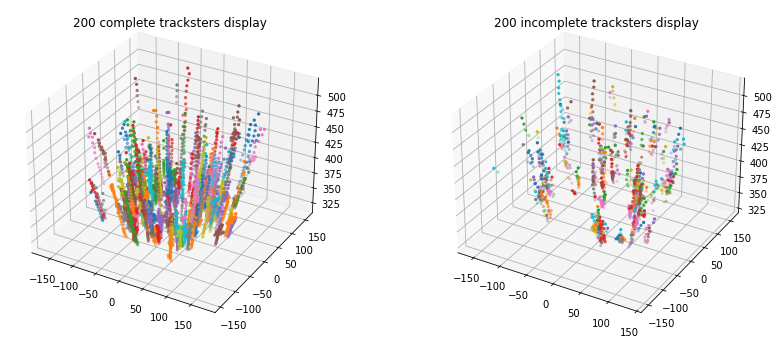

In [8]:
i = 0
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('200 complete tracksters display', x=0.5, y=1)
for x, y, z, l in zip(vx, vy, vz, tl):
    if l == 1:
        i+=1
        ax.scatter(x, y, z, s=5)
    if i == 200:
        break

i = 0
ax = fig.add_subplot(122, projection='3d')
ax.set_title('200 incomplete tracksters display', x=0.5, y=1)
for x, y, z, l in zip(vx, vy, vz, tl):
    if l == 0:
        i+=1
        ax.scatter(x, y, z, s=5)
    if i == 200:
        break

2D and 3D plot for complete event

In [9]:
complete_idx = np.where(tl == 1)[0]
incomplete_idx = np.where(tl == 0)[0]
print("Complete tracksters:", complete_idx)
print("Inomplete tracksters:", incomplete_idx)

Complete tracksters: [540, 541, 542, 543, 544, 545, 546, ... 56082, 56083, 56084, 56085, 56086, 56087]
Inomplete tracksters: [0, 1, 2, 3, 4, 5, 6, 7, ... 56041, 56042, 56043, 56044, 56045, 56046, 56047, 56048]


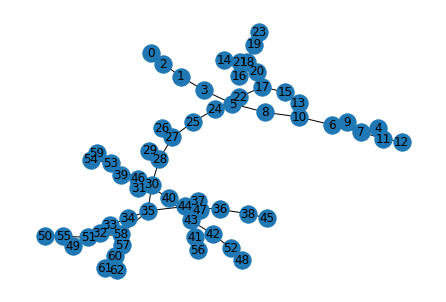

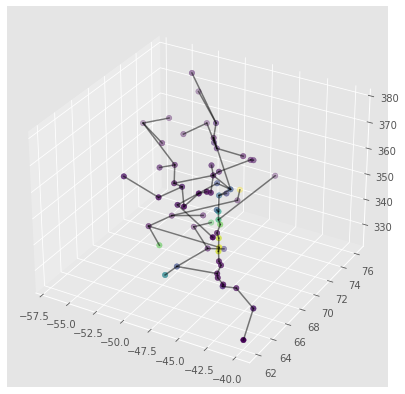

In [10]:
tid = complete_idx[0]
G = create_graph(vx[tid], vy[tid], vz[tid], energy[tid], N=1)
nx.draw(G, with_labels=True)
network_plot_3D(G, energy[tid])

2D and 3D plot for incomplete event

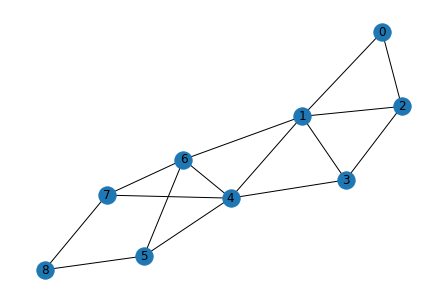

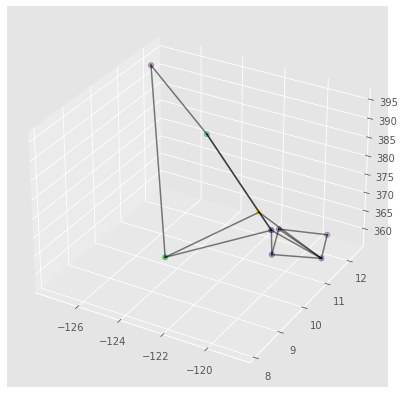

In [11]:
tid = incomplete_idx[5]
G = create_graph(vx[tid], vy[tid], vz[tid], energy[tid], N=2)
nx.draw(G, with_labels=True)
network_plot_3D(G, energy[tid])